In [7]:
from utils import *
import pandas as pd
import mne
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.preprocessing import normalize, StandardScaler
plt.style.use('seaborn-whitegrid')

TYPE_DEF = {0:'Non-Stress', 1:'Neutral', 2: 'Stress'}
PSS = load('PSS')
type_count = load('type_count')

def get_markers(start = 0, stop = 5, every = 0.25):
    sampling_rate = 125 #Hz
    # 15/60 = 0.25
    step_minutes = np.arange(start,stop,every)
    print(f"{step_minutes=}")
    step_minutes = np.expand_dims(step_minutes * sampling_rate * 60, axis=1)
    markers = np.concatenate( [step_minutes, np.zeros( step_minutes.shape ), np.ones( step_minutes.shape ) ], axis=1  ).astype(np.int64)
    return markers
# markers = get_markers(0,5,0.25)

In [2]:
name, info = PSS.popitem()

# Raw

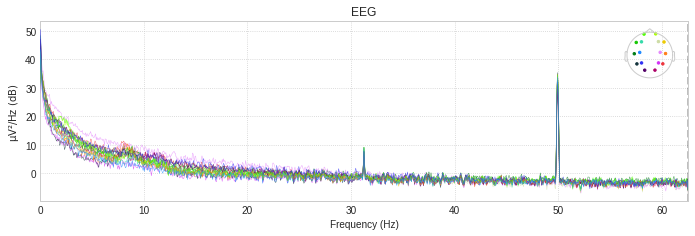

step_minutes=array([1.  , 1.25])


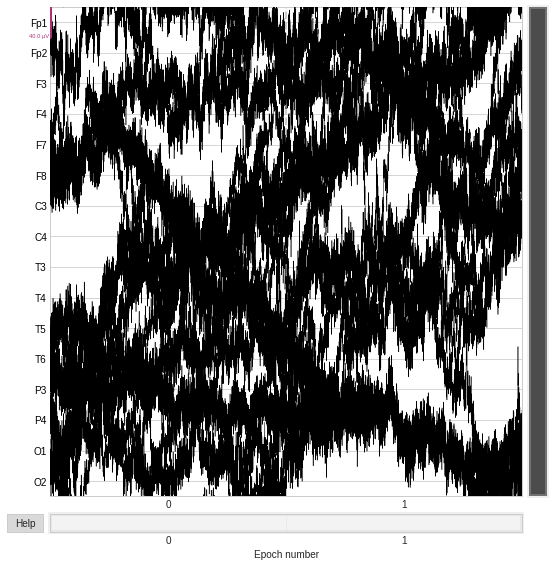

In [11]:
raw = info['raw'].copy()
raw.plot_psd()
markers = get_markers(1,1.5,0.25)
epochs = mne.Epochs(raw, markers, tmin=0, tmax=15, baseline=None, verbose=False)
temp = epochs.plot()


# HP at 0.000001 Hz

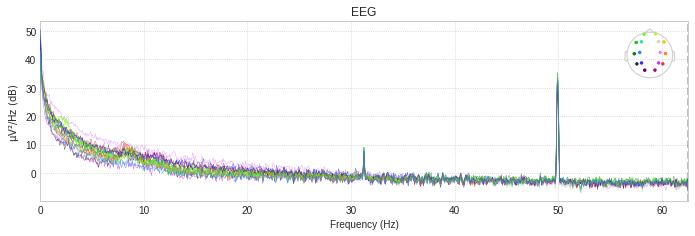

step_minutes=array([1.  , 1.25])
    Using multitaper spectrum estimation with 7 DPSS windows


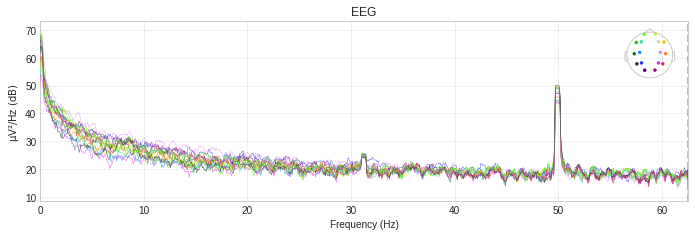

    Using multitaper spectrum estimation with 7 DPSS windows


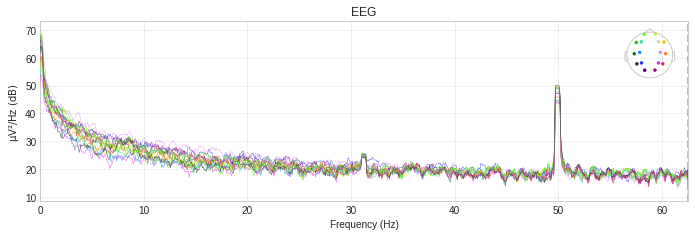

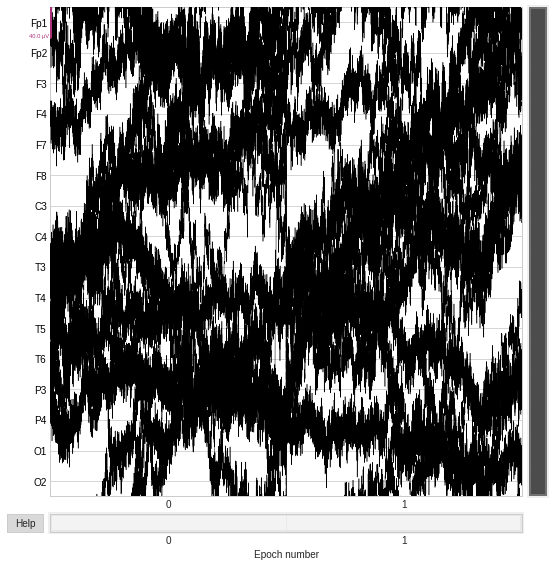

In [52]:
raw = info['raw'].copy()
raw.filter(l_freq=0.000001,h_freq=None, method='iir', iir_params={'order':3.0, 'ftype':'butter'}, verbose=False) # Slow drift
raw.plot_psd()
raw = info['raw'].copy()
markers = get_markers(1,1.5,0.25)
epochs = mne.Epochs(raw, markers, tmin=0, tmax=15, baseline=None, verbose=False)
epochs.plot_psd()
raw = info['raw'].copy()
epochs = mne.Epochs(raw, markers, tmin=0, tmax=15, baseline=(0,2), verbose=False)
epochs.plot_psd()
temp = epochs.plot()


step_minutes=array([1.  , 1.25])
    Using multitaper spectrum estimation with 7 DPSS windows


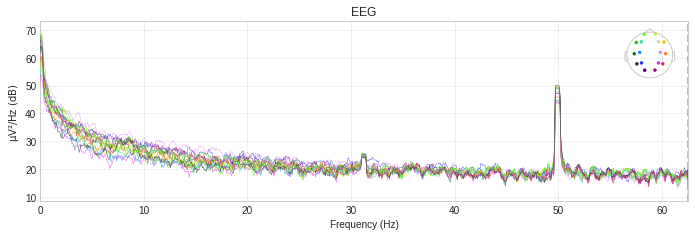

    Using multitaper spectrum estimation with 7 DPSS windows


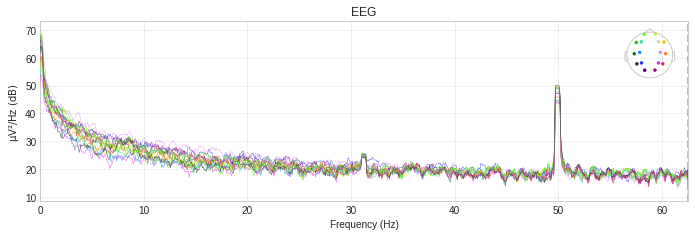

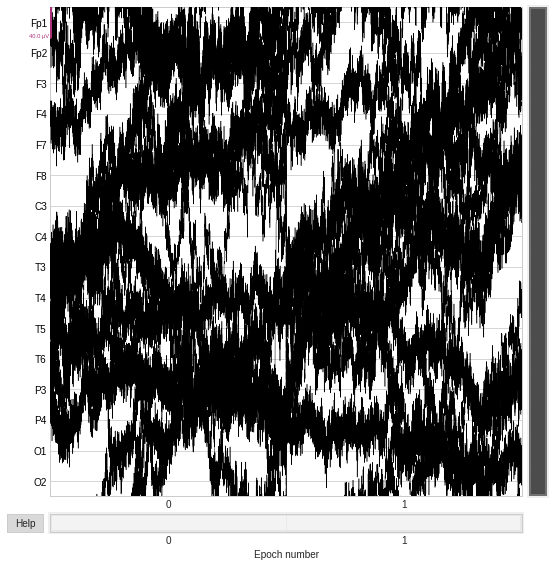

In [53]:
raw = info['raw'].copy()
# raw.plot_psd()
markers = get_markers(1,1.5,0.25)
epochs_none = mne.Epochs(raw, markers, tmin=0, tmax=15, baseline=None, verbose=False)
temp = epochs_none.plot_psd()

epochs = mne.Epochs(raw, markers, tmin=0, tmax=15, baseline=(0,2), verbose=False)
temp = epochs.plot_psd()
temp = epochs.plot()


In [75]:
a = list(epochs_none.iter_evoked())[0].data
b = list(epochs.iter_evoked())[0].data
print(a == b)


print(a[0].mean())
print(b[0].mean())
# print(b.shape)
print((b[0] - a[0].mean()) == a[0])

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [ True  True  True ...  True  True  True]]
0.0075240474573560765
1.3925732256475578e-05
[False False False ... False False False]


https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5722792/

The frontal asymmetry is most commonly computed by subtracting the natural log of left hemisphere alpha power (EEG electrode F3) from the natural log of right hemisphere alpha power (F4) while using the central Cz as reference electrode

In [6]:
def get_freq(PSS):
    # peak at info
    temp = PSS.popitem()
    PSS[temp[0]] = temp[1]
    raw = temp[1]['raw']
    power,freq = mne.time_frequency.psd_welch(raw,n_fft=125, verbose=True)
    return freq


for name, info in PSS.items():
    raw = info['raw']
    raw.filter(l_freq=1,h_freq=None, method='iir', iir_params={'order':3.0, 'ftype':'butter'}, verbose=False) # Slow drift
    raw.notch_filter(freqs=[50])

freq = get_freq(PSS)
print(freq)


band_names = np.array(['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma', 'Slow', 'Low_beta'])
filter_list = [[1,3],[4,7],[8,12],[13,30],[30,43], [4,13], [13,17]]
bands = []
for filt in filter_list:
    pt = np.argwhere((freq >= filt[0]) & (freq <= filt[1])).reshape(-1)
    bands.append(pt)
bands = np.array(bands)
print(bands)


# markers

Effective window size : 1.000 (s)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62.]
[array([1, 2, 3]) array([4, 5, 6, 7]) array([ 8,  9, 10, 11, 12])
 array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
        30])
 array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43])
 array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13])
 array([13, 14, 15, 16, 17])]
step_minutes=array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75])


/tmp/ipykernel_3442/579975648.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bands = np.array(bands)


In [20]:
name, info = PSS.popitem()

step_minutes=array([1.  , 1.25])


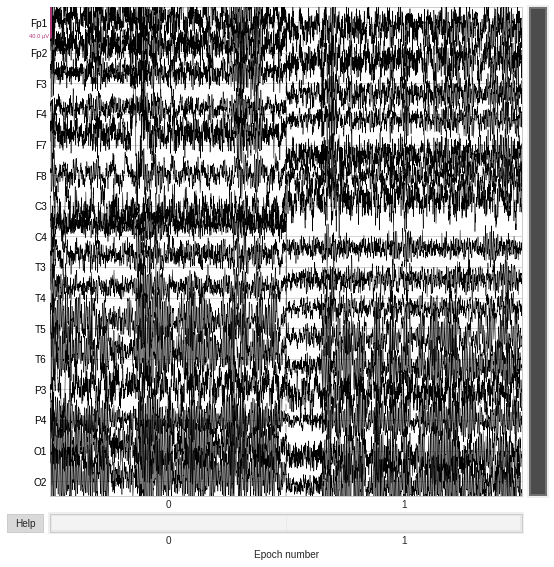

In [54]:
raw = info['raw'].copy()
markers = get_markers(1,1.5,0.25)
epochs = mne.Epochs(raw, markers, tmin=0, tmax=15, baseline=(0,0), verbose=False)
temp = epochs.plot()


step_minutes=array([1.  , 1.25])


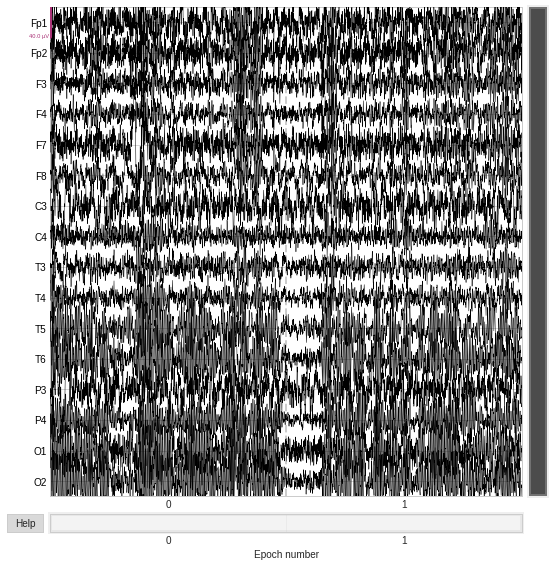

In [57]:
raw = info['raw'].copy()
markers = get_markers(1,1.5,0.25)
epochs = mne.Epochs(raw, markers, tmin=0, tmax=15, baseline=None, verbose=False)
# epochs
temp = epochs.plot()


step_minutes=array([0.  , 0.25, 0.5 , 0.75])
    Using multitaper spectrum estimation with 7 DPSS windows


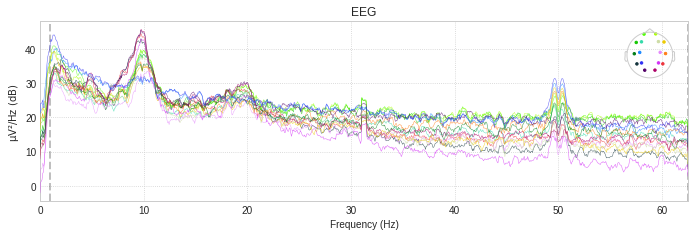

In [23]:
raw = info['raw'].copy()
markers = get_markers(0,1,0.25)
epochs = mne.Epochs(raw, markers, tmin=0, tmax=15, baseline=(0,1.5), verbose=False)
temp = epochs.plot_psd()


step_minutes=array([0.  , 0.25, 0.5 , 0.75])
    Using multitaper spectrum estimation with 7 DPSS windows


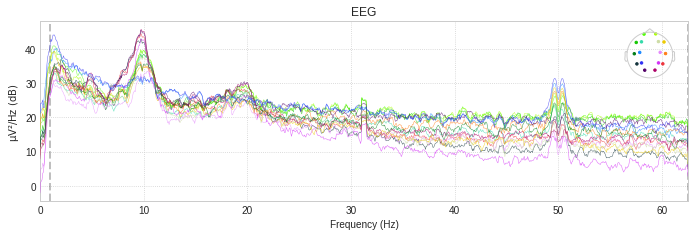

In [24]:
raw = info['raw'].copy()
markers = get_markers(0,1,0.25)
epochs = mne.Epochs(raw, markers, tmin=0, tmax=15, baseline=(0,2), verbose=False)
temp = epochs.plot_psd()


In [3]:
# features = None
for name,info in PSS.items():
    raw = info['raw']
    epochs = mne.Epochs(raw, markers, tmin=0, tmax=15, baseline=(0,15), verbose=False)
    feature_epochs = None
    for evoked in epochs.iter_evoked():
        feature = None
        slow, gamma = None, None
        a_f3, a_f4 = None, None
        a_t7, a_t8 = None, None
        b_f3, b_f4 = None, None
        b_t7, b_t8 = None, None
        for index, band in enumerate(bands):
            power,freq = mne.time_frequency.psd_welch(evoked,n_fft=125, verbose=False)
            power = power.squeeze()
            power = 10 * np.log10(power)
            data = power[::,band].mean(axis=1).reshape(1,-1)
            # for asym
            if(band_names[index] == 'Alpha'):
                a_f3 = data[:,raw.ch_names.index('F3')]
                a_f4 = data[:,raw.ch_names.index('F4')]
                # We use t3 as t7 and t4 as t8
                a_t7 = data[:,raw.ch_names.index('T3')]
                a_t8 = data[:,raw.ch_names.index('T4')]
            if(band_names[index] == 'Beta'):
                b_f3 = data[:,raw.ch_names.index('F3')]
                b_f4 = data[:,raw.ch_names.index('F4')]
                # We use t3 as t7 and t4 as t8
                b_t7 = data[:,raw.ch_names.index('T3')]
                b_t8 = data[:,raw.ch_names.index('T4')]

            ####### Mean for visualization #######
            data = data.mean().reshape(1,-1)
            # for relative gamma
            if(band_names[index] == 'Slow'): slow = data
            if(band_names[index] == 'Gamma'): gamma = data

            if(type(feature) == type(None)): feature = data
            else: feature = np.concatenate([feature, data], axis=1)

        # the eighth feature: relative gamma is slow/gamma
        relative_gamma = slow/gamma
        feature = np.concatenate([feature, relative_gamma], axis=1)
        # The asymetry
        alpha_frontal = ((a_f4 - a_f3) / (a_f4 + a_f3)).reshape(1,-1)
        feature = np.concatenate([feature, alpha_frontal], axis=1)
        # alpha_temporal
        alpha_temporal = ((a_t8 - a_t7) / (a_t8 + a_t7)).reshape(1,-1)
        feature = np.concatenate([feature, alpha_temporal], axis=1)
        # alpha_asymmetry
        alpha_asymmetry = alpha_frontal + alpha_temporal
        feature = np.concatenate([feature, alpha_asymmetry], axis=1)
        # beta_frontal
        beta_frontal = ((b_f4 - b_f3) / (b_f4 + b_f3)).reshape(1,-1)
        feature = np.concatenate([feature, beta_frontal], axis=1)
        # beta_temporal
        beta_temporal = ((b_t8 - b_t7) / (b_t8 + b_t7)).reshape(1,-1)
        feature = np.concatenate([feature, beta_temporal], axis=1)

        if(type(feature_epochs) == type(None)): feature_epochs = feature
        else: feature_epochs = np.concatenate( [feature_epochs, feature], axis=0 )
    info['feature'] = feature_epochs
print(f"{feature_epochs.shape=}")


feature_epochs.shape=(20, 13)
